In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (2).csv


In [112]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [114]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [116]:
df.shape

(517, 31)

In [117]:
df=df.drop_duplicates()

In [118]:
df.shape

(509, 31)

,size_category,counts
0,small,371
1,large,138


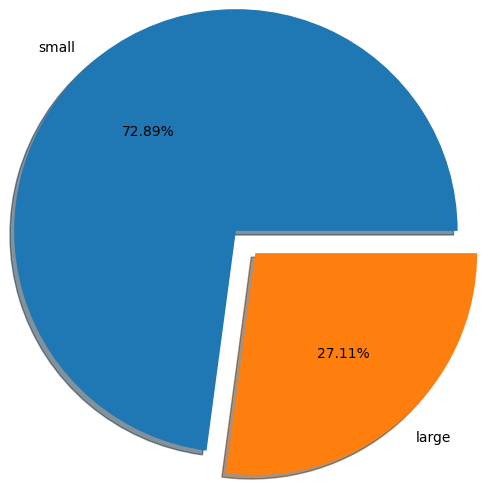

In [119]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [120]:
#Other features with target variable
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,135
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
13,small,feb,14
16,small,jun,13
6,large,mar,11
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

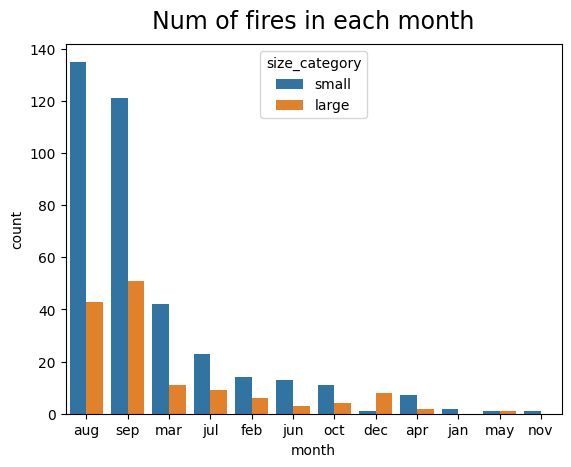

In [121]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

Observation:

Aug month has seen highest number of small fires.
Whereas sep month has seen highest num of large fires.
Least num of fires occured in month of nov.

In [122]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,67
7,small,fri,62
9,small,sat,57
8,small,mon,55
11,small,thu,47
12,small,tue,43
13,small,wed,40
3,large,sun,27
2,large,sat,25
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

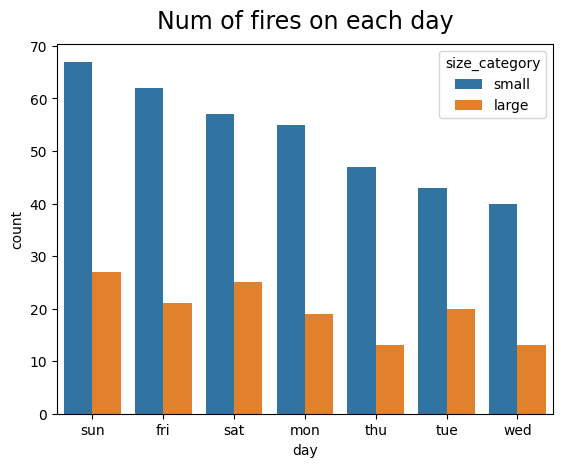

In [123]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

Observation:

Highest num of small as well as large fires have occured on a Sunday.

Lowest num of small fires have occured on a Wednesday.

Lowest num of large fires have occured on a Wednesday and Thursday.

In [124]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int64

In [125]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,365
0,0,0.0,137
3,1,0.2,2
1,0,6.4,1
4,1,0.4,1
5,1,0.8,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

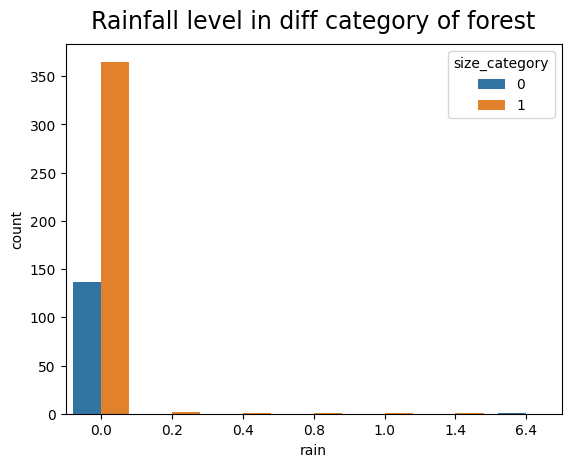

In [126]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

Observation:

0 represents large forest fire, 1 represents small forest fire.

Majority of the forests have almost no rainfall.

Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.


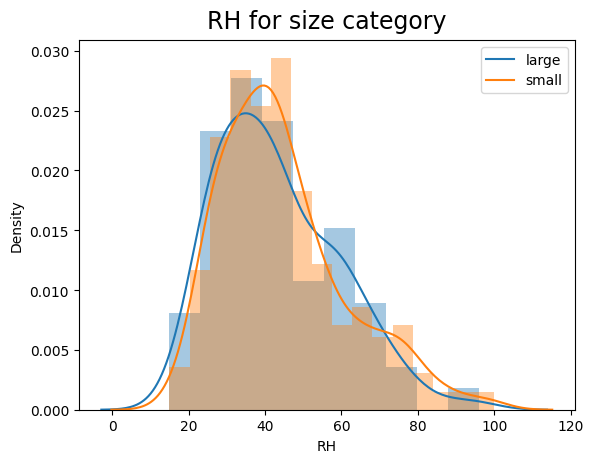

In [127]:
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

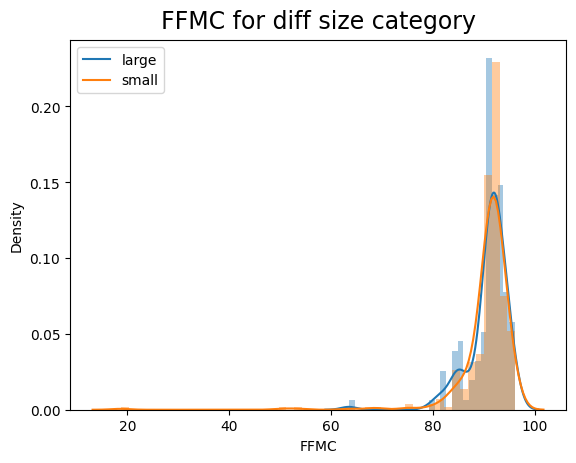

In [128]:
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Highly skewed data.
There are definitly outliers in this variable.

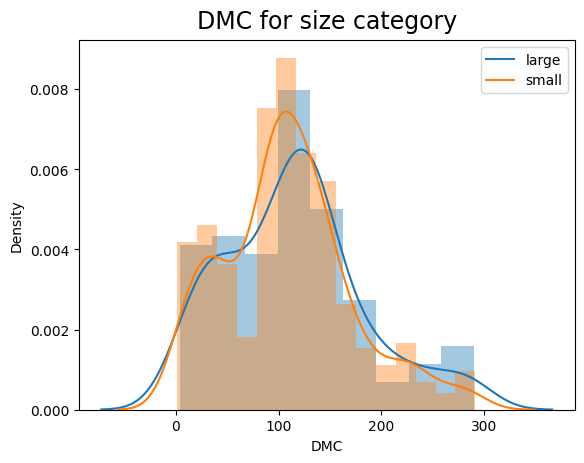

In [129]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

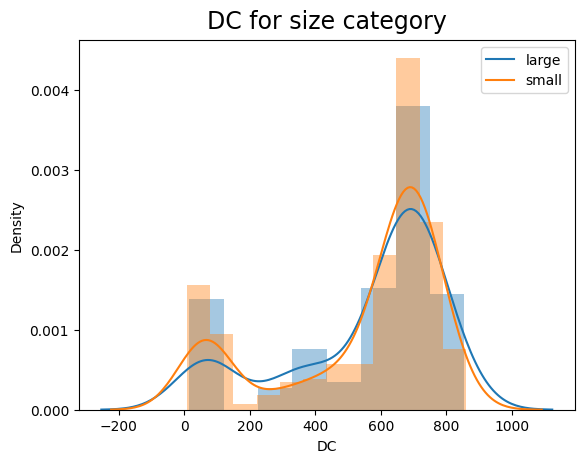

In [131]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True

plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Highly skewed data.
Outliers are present.

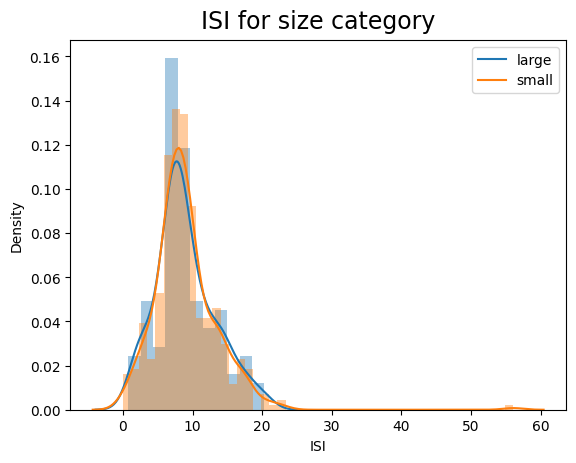

In [132]:
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)


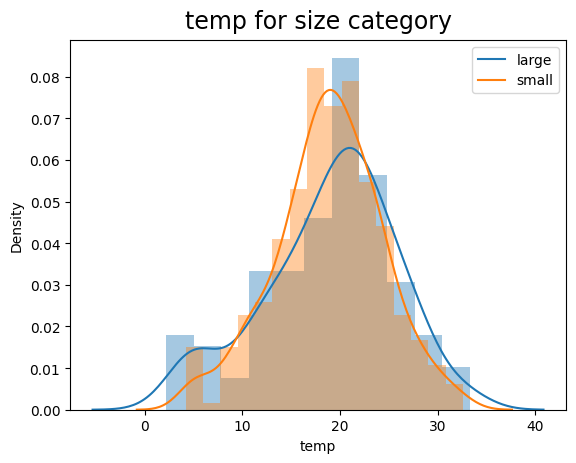

In [133]:
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

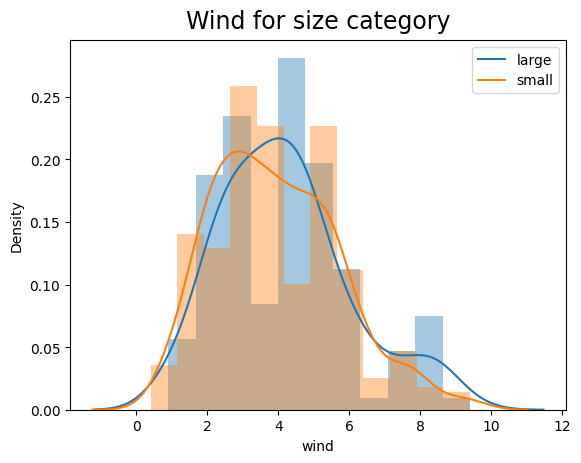

In [134]:
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

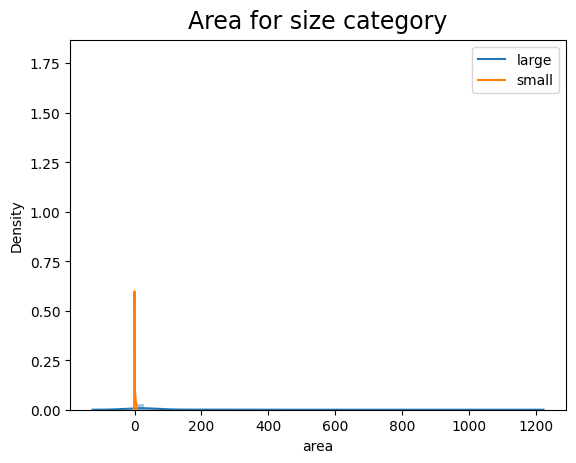

In [136]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Large the forest area, larger the fire. So we can see, area large area forest are coming under large forest fire category.

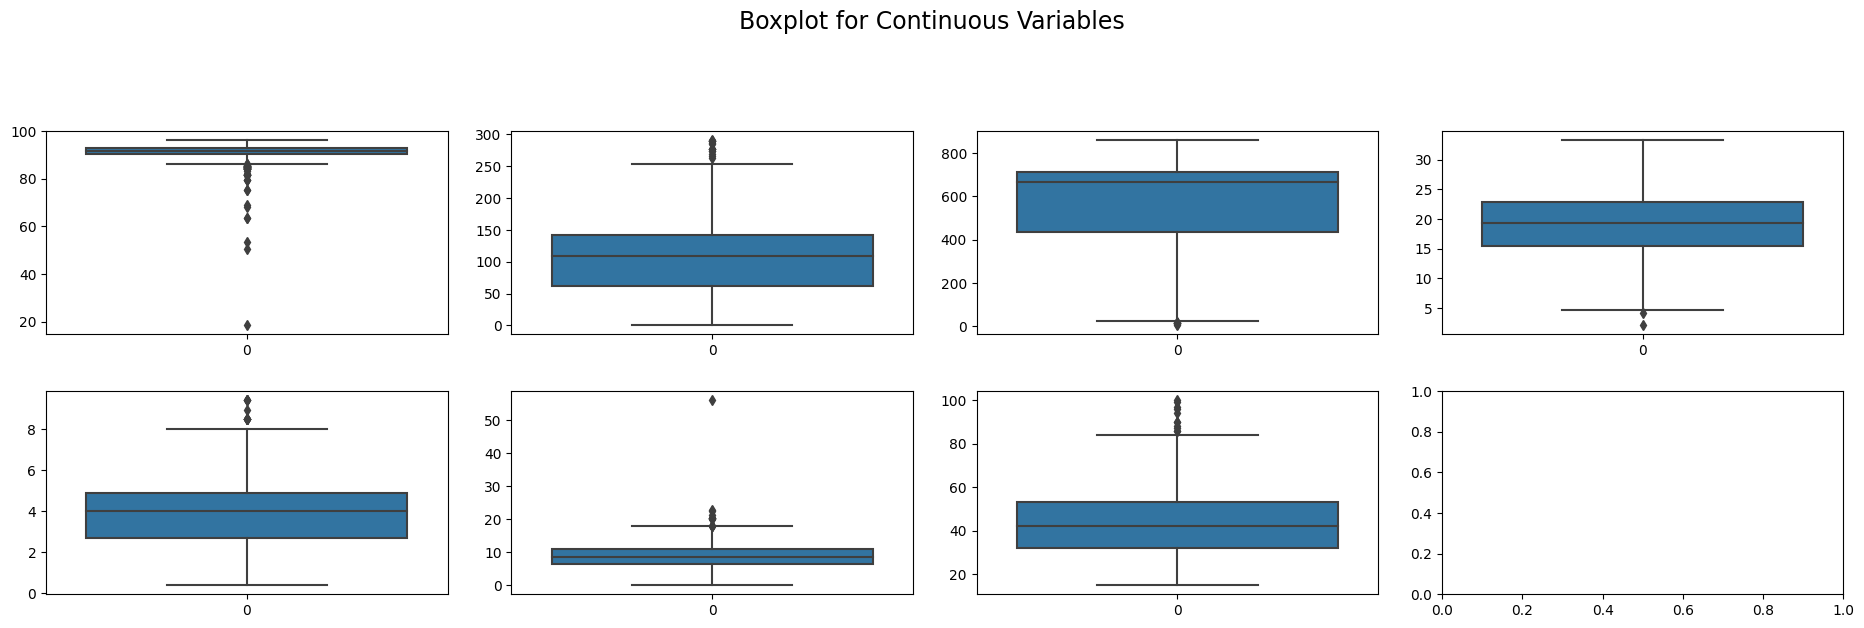

In [137]:
#check for outliers
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

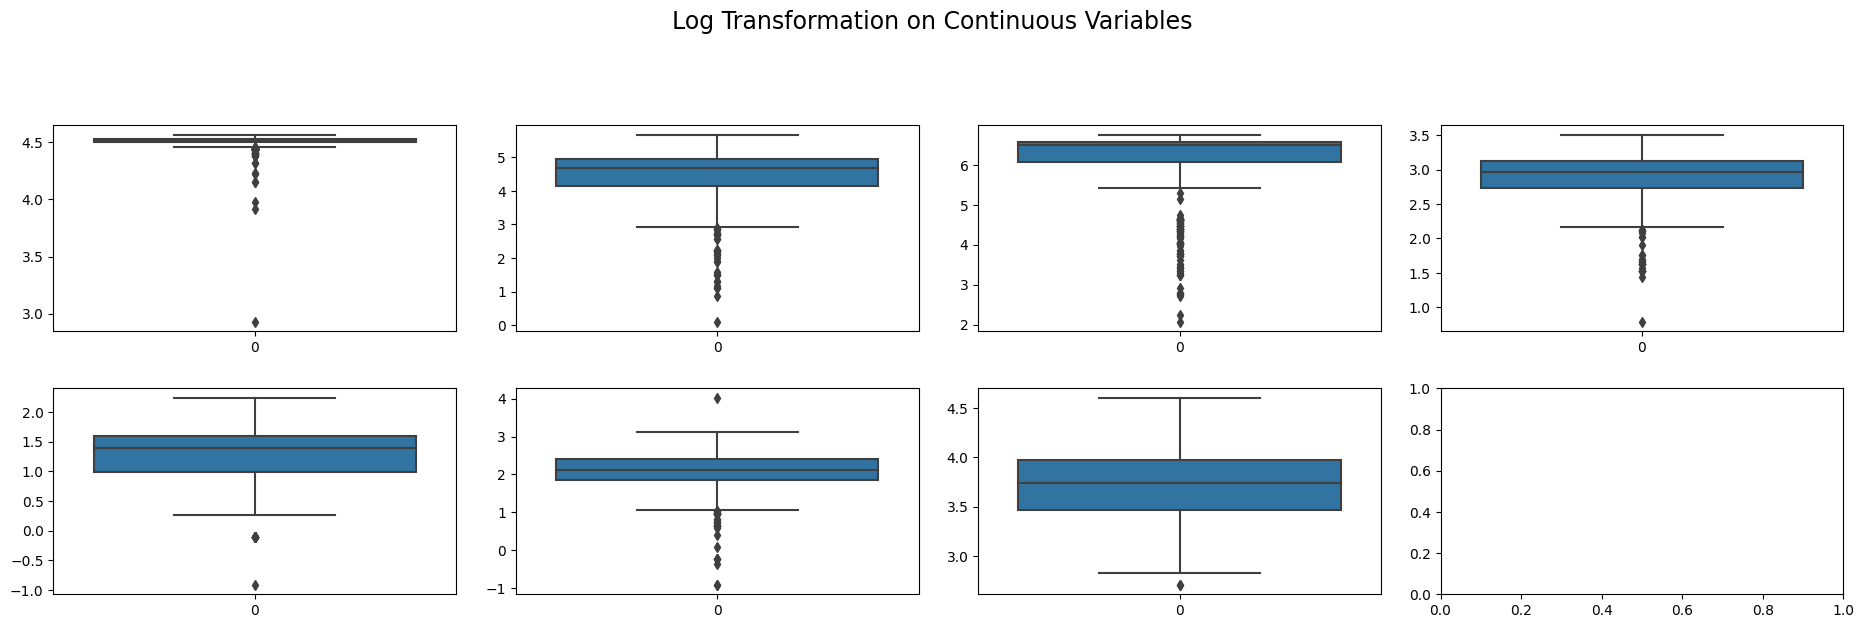

In [138]:
#Let ustry to treat our outliers by log tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

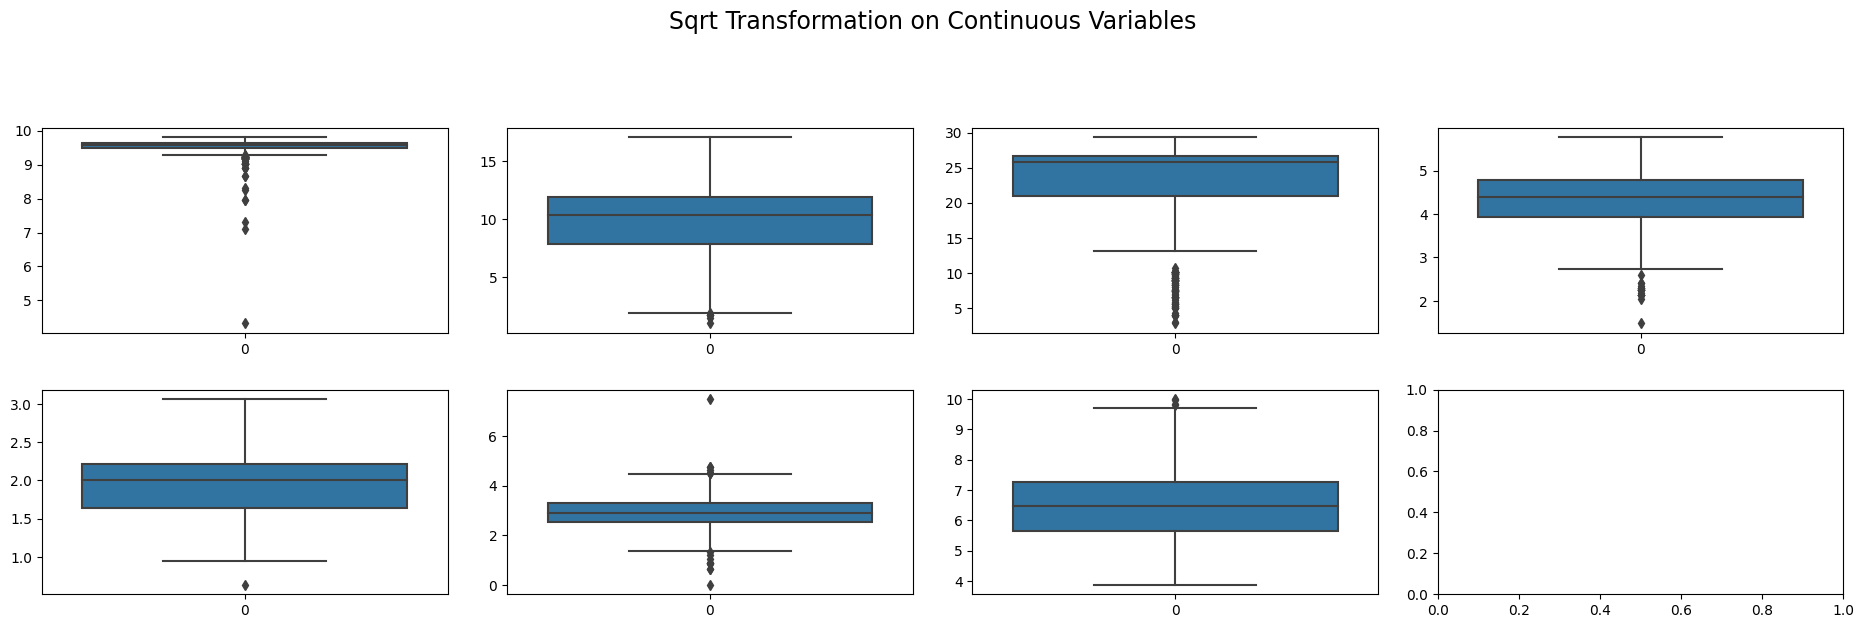

In [139]:
#Let ustry to treat our outliers by sqrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


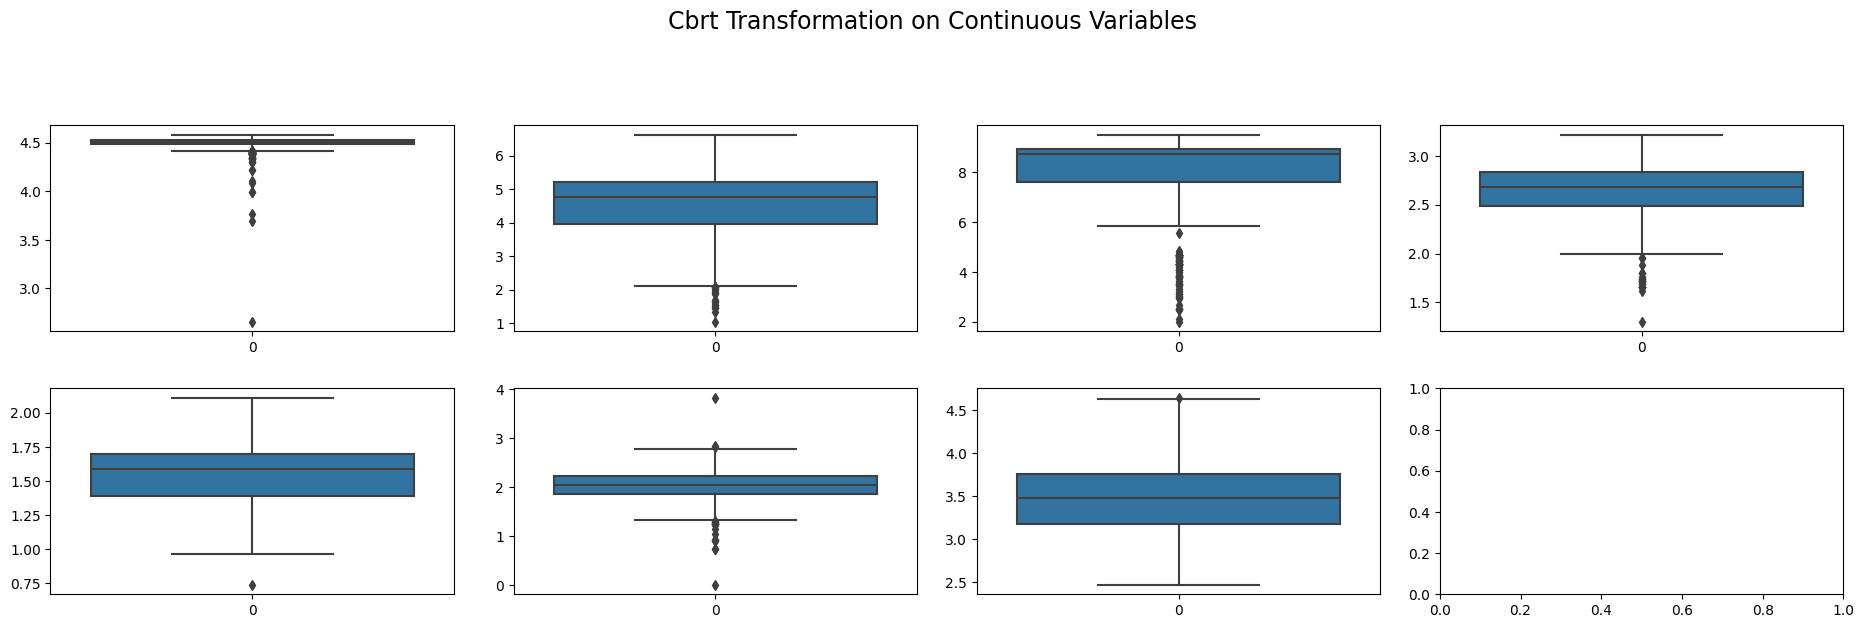

In [140]:
#Let ustry to treat our outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [141]:
#to get correlation of target variable with numerical columns
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [142]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr


,size_category
FFMC,-0.024292
DMC,-0.046598
DC,-0.028372
ISI,0.007867
temp,-0.009976
RH,0.039730
wind,-0.059513
rain,-0.053463
area,-0.310561
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

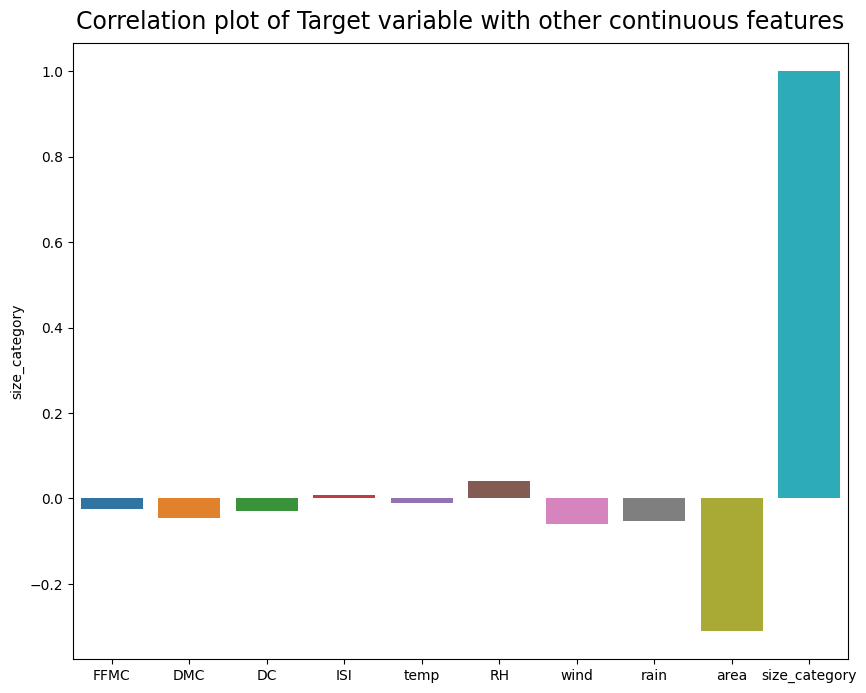

In [143]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Highest corr of size_category has with area of forest.
Then ranks wind

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

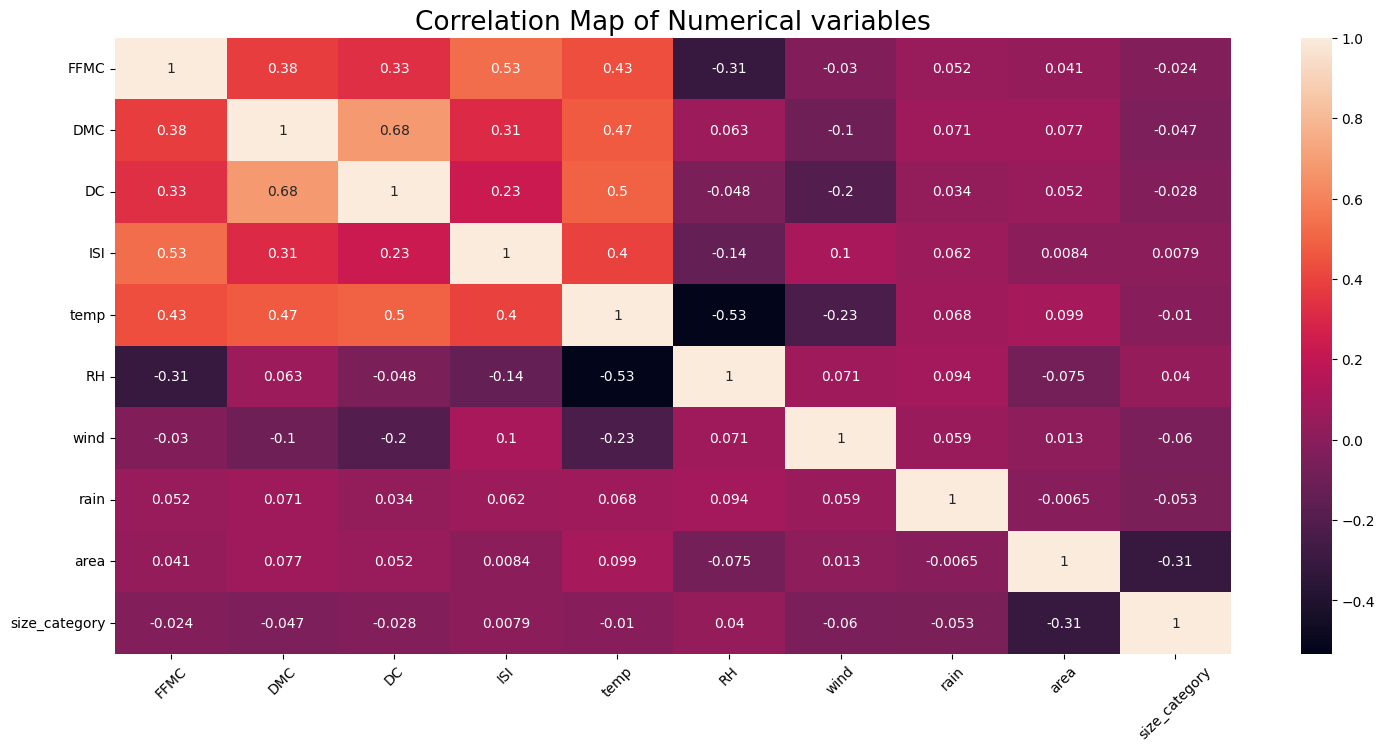

In [144]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

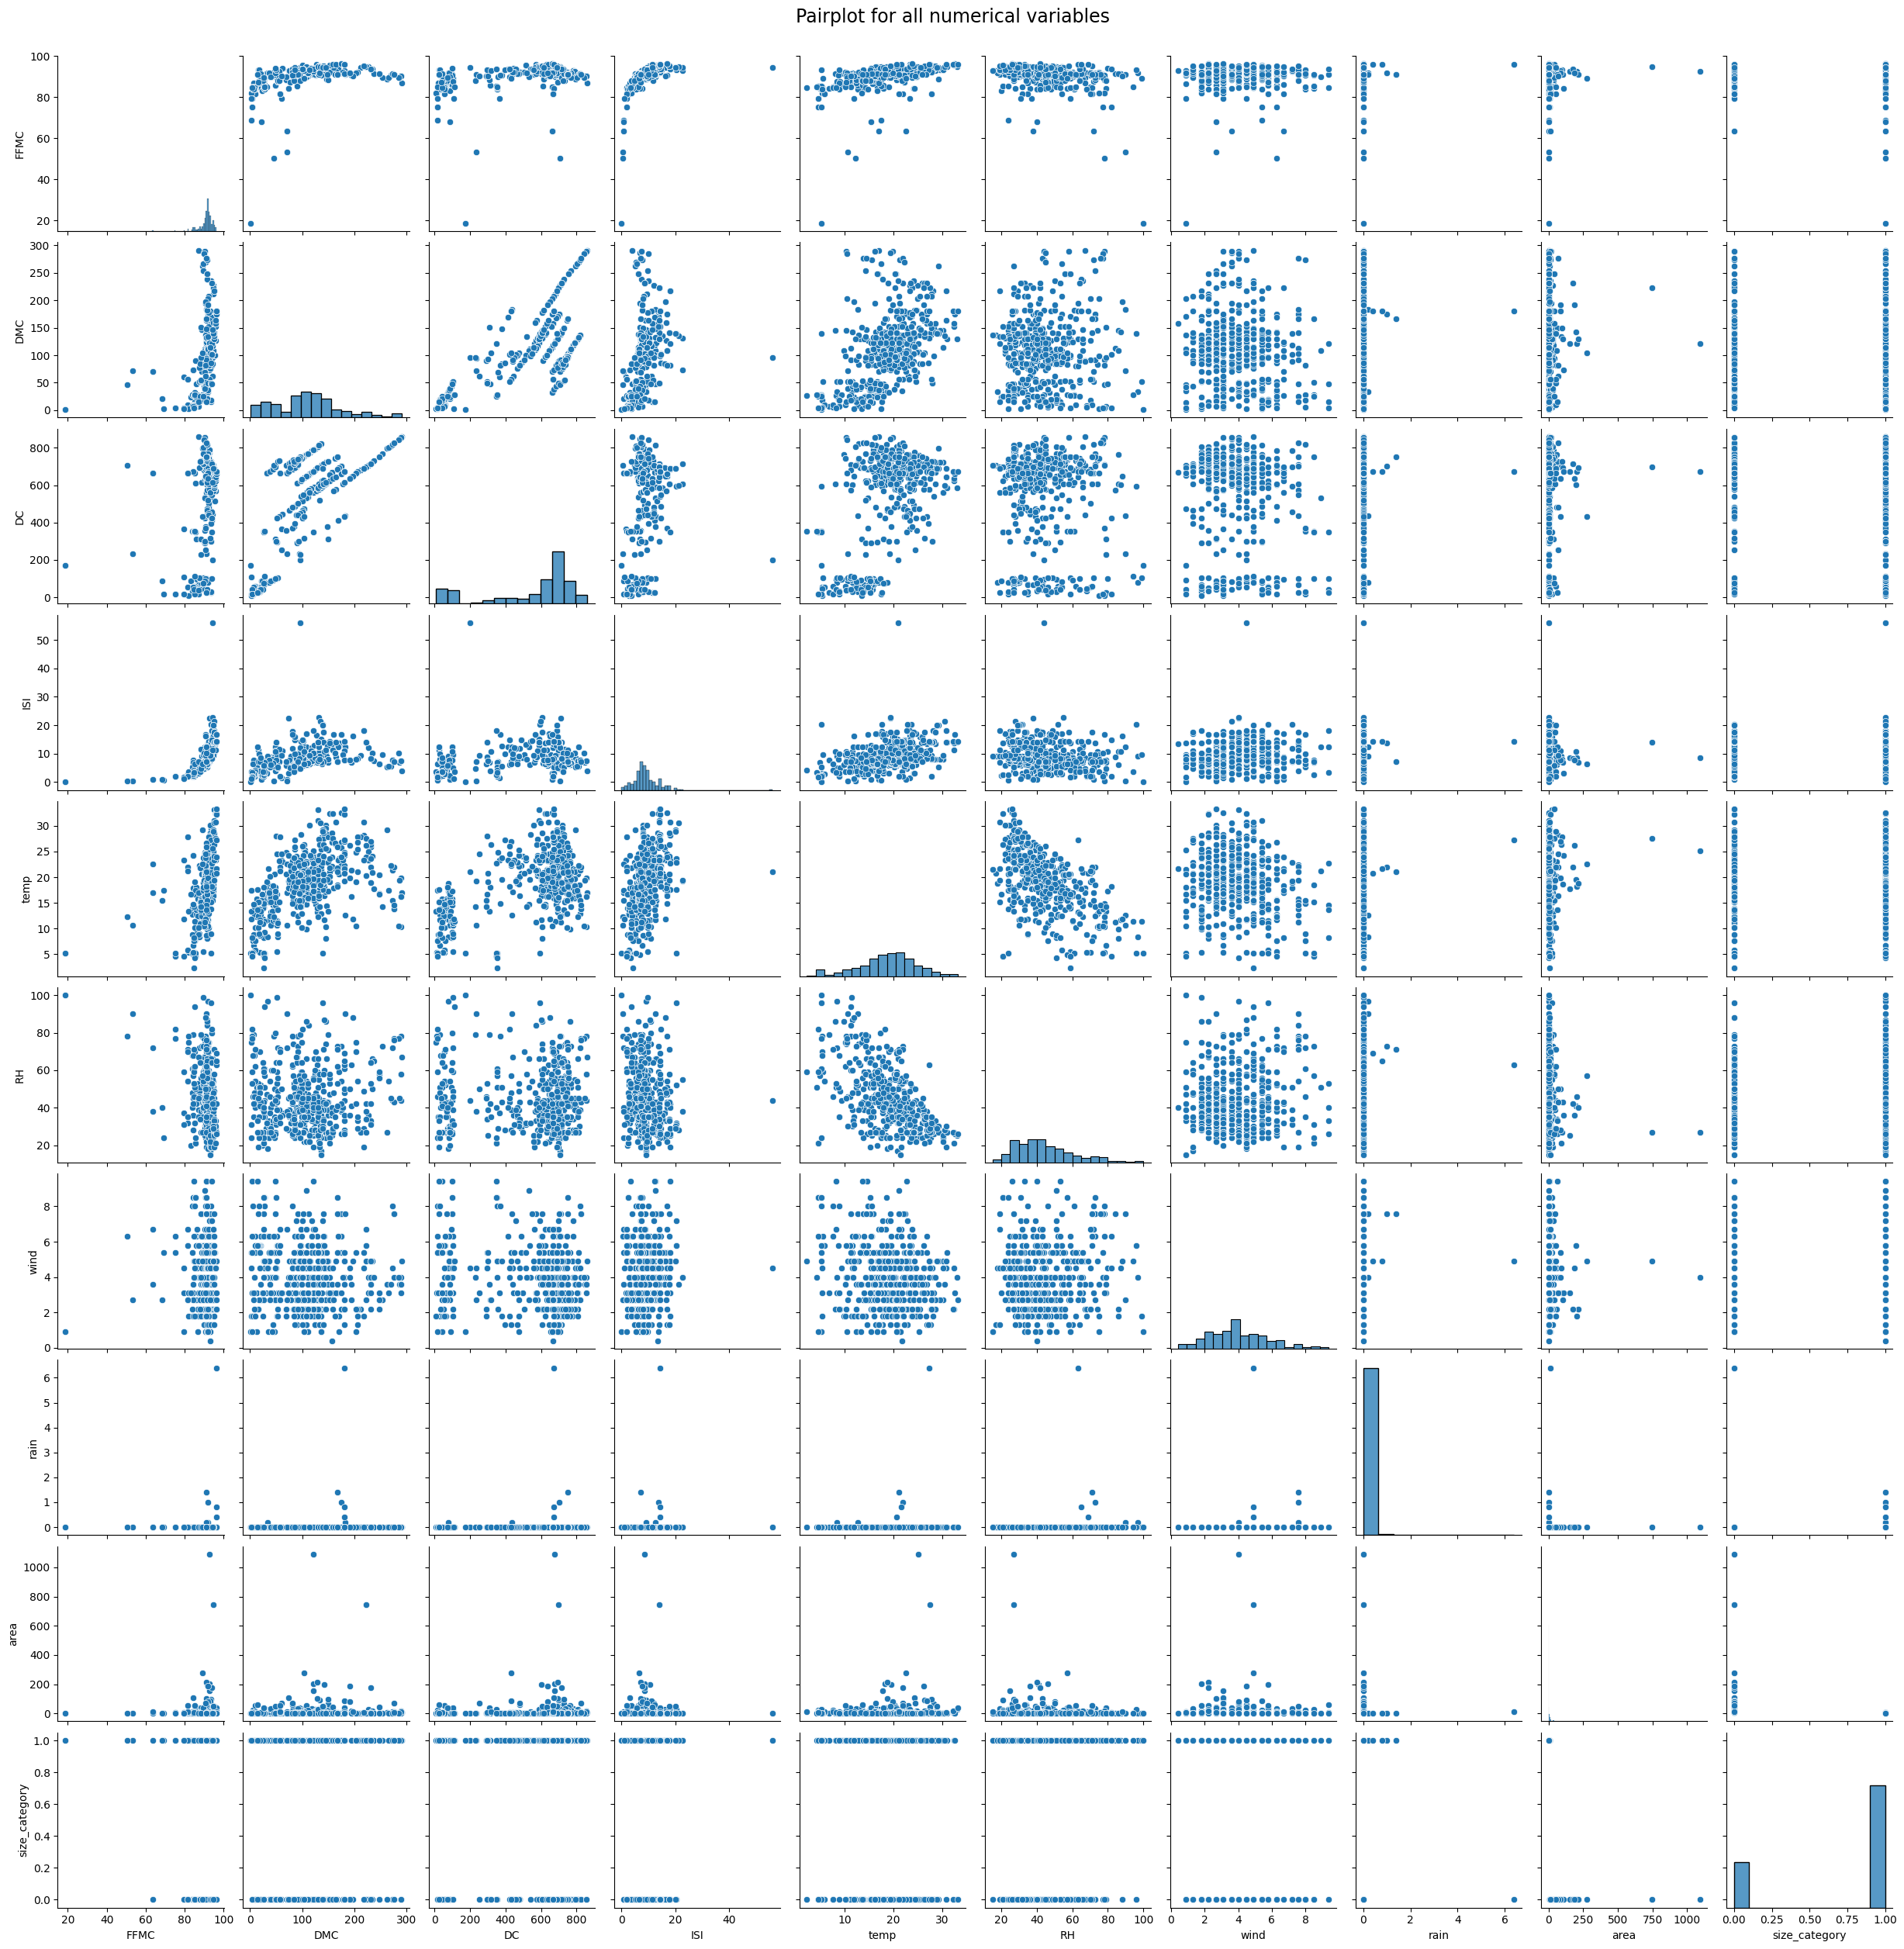

In [145]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

Data Preprocessing

In [146]:
#drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [148]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [149]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [150]:
df.shape

(509, 27)

In [152]:
x = df.drop('size_category', axis=1)
y = df['size_category']
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)
x_std.head()



,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,-0.438221,-0.475926,-0.365555,-0.375840,-0.340922,-0.134164,-0.733324,-0.134164,-0.202237,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,-0.438221,-0.475926,-0.365555,2.660708,-0.340922,-0.134164,-0.733324,-0.134164,-0.202237,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,2.281955,-0.475926,-0.365555,-0.375840,-0.340922,-0.134164,-0.733324,-0.134164,-0.202237,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,-0.438221,-0.475926,-0.365555,-0.375840,-0.340922,-0.134164,-0.733324,-0.134164,-0.202237,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,-0.438221,2.101165,-0.365555,-0.375840,-0.340922,-0.134164,-0.733324,-0.134164,-0.202237,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((381, 26), (128, 26), (381,), (128,))

BUILD A MODEL

In [154]:
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [159]:

from keras.layers import Dropout

# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [160]:
import warnings
warnings.filterwarnings("ignore")

In [161]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.935 total time=   1.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.882 total time=   2.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.895 total time=   1.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.855 total time=   1.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.908 total time=   1.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [162]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9080656170845032, using {'batch_size': 10, 'epochs': 50}
0.8949077129364014,0.02657306385980106 with: {'batch_size': 10, 'epochs': 10}
0.9080656170845032,0.02898508880531444 with: {'batch_size': 10, 'epochs': 50}
0.8975734710693359,0.024322796954306003 with: {'batch_size': 10, 'epochs': 100}
0.8502050518989563,0.0558386012269214 with: {'batch_size': 20, 'epochs': 10}
0.8976076602935791,0.034788655990075495 with: {'batch_size': 20, 'epochs': 50}
0.9028024554252625,0.03969892621175066 with: {'batch_size': 20, 'epochs': 100}
0.747744357585907,0.06583135897234028 with: {'batch_size': 40, 'epochs': 10}
0.8791866183280945,0.019698741764584773 with: {'batch_size': 40, 'epochs': 50}
0.8974709510803223,0.03389286437438972 with: {'batch_size': 40, 'epochs': 100}


In [164]:
#get best value for learning rate and dropuout by hyperparameter tuning
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 26,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.948 total time=   6.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.908 total time=  11.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.895 total time=   6.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.855 total time=   6.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.908 total time=   5.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [165]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.9290498852729797, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9027682781219483,0.029746963821854717 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9079972505569458,0.030184630576993 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.75047847032547,0.05515171960767433 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9211209893226624,0.037312932490662254 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9054340243339538,0.04037954493373983 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7216677904129029,0.03737389539279088 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9264183044433594,0.028467191776909647 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9290498852729797,0.03079522437629175 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7216677904129029,0.03737389539279088 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [168]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=  11.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.789 total time=   8.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.763 total time=  11.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.763 total time=   7.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.855 total time=   6.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [169]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.9526999235153198, using {'activation_function': 'tanh', 'init': 'uniform'}
0.8030417084693908,0.03945371997729434 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8214627385139466,0.02332932413517725 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8109706163406372,0.028644060418900965 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9211551547050476,0.04642143975485151 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9080314397811889,0.03018516184484621 with: {'activation_function': 'relu', 'init': 'normal'}
0.7216677904129029,0.03737389539279088 with: {'activation_function': 'relu', 'init': 'zero'}
0.9526999235153198,0.02839402261030074 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9526999235153198,0.02839402261030074 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7216677904129029,0.03737389539279088 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9526657462120056,0.03494538036151004 with: {'activat

In [170]:
# Defining the model
#get best value for neuron by hyperparameter tuning

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate= 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=  11.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.947 total time=   7.3s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.947 total time=   6.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.908 total time=  11.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.987 total time=  11.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [171]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9553656816482544, using {'neuron1': 16, 'neuron2': 2}
0.9501025319099426,0.0255571896510566 with: {'neuron1': 4, 'neuron2': 2}
0.9526999235153198,0.02839402261030074 with: {'neuron1': 4, 'neuron2': 4}
0.9526999235153198,0.02839402261030074 with: {'neuron1': 4, 'neuron2': 8}
0.9448393702507019,0.0305165149130844 with: {'neuron1': 8, 'neuron2': 2}
0.955297327041626,0.029575987439513354 with: {'neuron1': 8, 'neuron2': 4}
0.9526657581329345,0.030727367109924575 with: {'neuron1': 8, 'neuron2': 8}
0.9553656816482544,0.03181511398380994 with: {'neuron1': 16, 'neuron2': 2}
0.955297327041626,0.03779889062313074 with: {'neuron1': 16, 'neuron2': 4}
0.9527682781219482,0.02437628422561333 with: {'neuron1': 16, 'neuron2': 8}


In [176]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)


# Printing the metrics

print("Test Accuracy:", accuracy_score(y_test,y_predict))

4/4 [==============================] - 0s 3ms/step
Test Accuracy: 0.96875


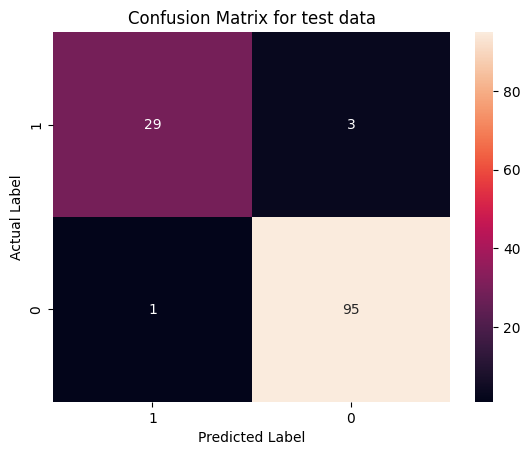

In [177]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [178]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

12/12 [==============================] - 0s 3ms/step
Train Accuracy: 0.9973753280839895


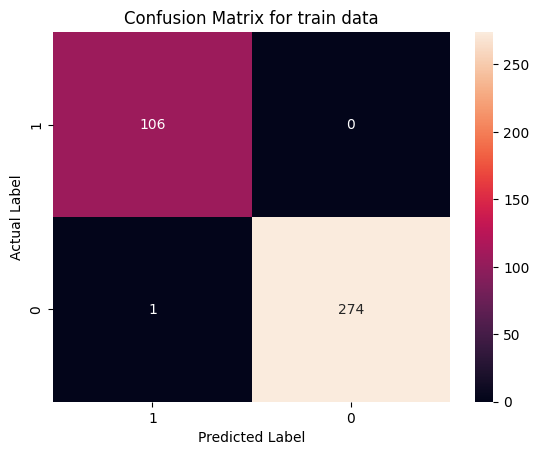

In [179]:
cm_df=confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()